# Polynomial Linear Regression — Theory & Interview Q&A

Polynomial Linear Regression models the relationship between the independent variable(s) and the dependent variable as an nth degree polynomial, allowing for non-linear relationships.

| Aspect                | Details                                                                 |
|-----------------------|------------------------------------------------------------------------|
| **Definition**        | Fits a polynomial curve to data to capture non-linear trends.           |
| **Equation**          | y = β₀ + β₁x + β₂x² + ... + βₙxⁿ + ε                                  |
| **Use Cases**         | Growth curves, price trends, biological data                            |
| **Assumptions**       | Same as linear regression, but allows non-linearity                     |
| **Pros**              | Captures non-linear relationships, flexible                             |
| **Cons**              | Prone to overfitting, less interpretable, sensitive to outliers         |
| **Key Parameters**    | Degree of polynomial, coefficients                                      |
| **Evaluation Metrics**| MSE, RMSE, R² Score                                                     |

## Interview Q&A

**Q1: When do you use Polynomial Regression?**  
A: When the relationship between variables is non-linear.

**Q2: How do you choose the degree of the polynomial?**  
A: Use cross-validation or domain knowledge; higher degrees risk overfitting.

**Q3: What is overfitting in polynomial regression?**  
A: When the model fits noise in the data, reducing generalization.

**Q4: How do you prevent overfitting?**  
A: Use regularization, limit degree, or increase data size.

**Q5: How is polynomial regression implemented in scikit-learn?**  
A: Using `PolynomialFeatures` to transform input features, then fit a linear model.

**Q6: What is the difference between linear and polynomial regression?**  
A: Linear fits a straight line, polynomial fits a curve.

Train Mean Squared Error: 20.3679
Train R² Score: 0.9355
Test Mean Squared Error: 15.8960
Test R² Score: 0.9512


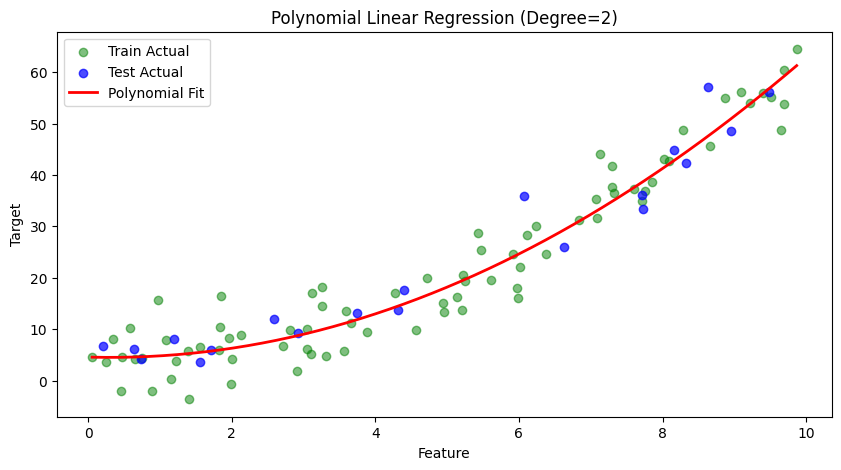

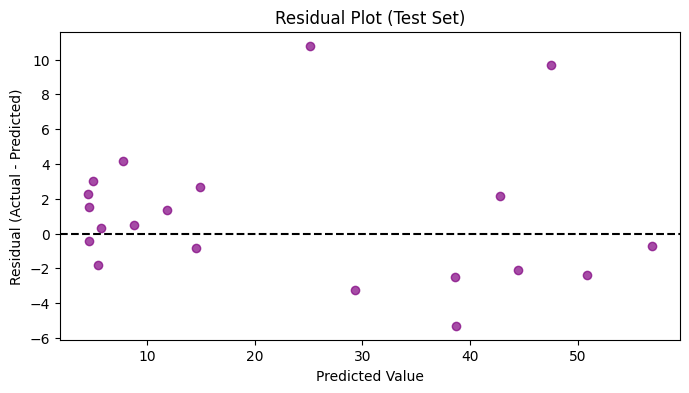

In [2]:
# Polynomial Linear Regression with Pipeline

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Function to create a polynomial regression pipeline
def create_polynomial_pipeline(degree=2):
    return Pipeline(steps=[
        ('scaler', StandardScaler()),
        ('poly', PolynomialFeatures(degree=degree)),
        ('model', LinearRegression())
    ])

# 1. Create synthetic non-linear data
np.random.seed(42)
X = np.random.rand(100, 1) * 10  # Feature
# Quadratic relationship + noise
y = 0.5 * X**2 + X + 2 + np.random.randn(100, 1) * 5  
y = y.ravel()

# 2. Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Polynomial Regression Pipeline
pipeline = create_polynomial_pipeline(degree=2)

# 4. Train model
pipeline.fit(X_train, y_train)

# 5. Predictions
y_train_pred = pipeline.predict(X_train)
y_test_pred = pipeline.predict(X_test)

# 6. Metrics
mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

print(f"Train Mean Squared Error: {mse_train:.4f}")
print(f"Train R² Score: {r2_train:.4f}")
print(f"Test Mean Squared Error: {mse_test:.4f}")
print(f"Test R² Score: {r2_test:.4f}")

# 7. Visualization: Fit on test and train
X_plot = np.linspace(X.min(), X.max(), 200).reshape(-1, 1)
y_plot = pipeline.predict(X_plot)

plt.figure(figsize=(10, 5))
plt.scatter(X_train, y_train, color='green', alpha=0.5, label='Train Actual')
plt.scatter(X_test, y_test, color='blue', alpha=0.7, label='Test Actual')
plt.plot(X_plot, y_plot, color='red', linewidth=2, label='Polynomial Fit')
plt.xlabel("Feature")
plt.ylabel("Target")
plt.title("Polynomial Linear Regression (Degree=2)")
plt.legend()
plt.show()

# 8. Residual Plot
plt.figure(figsize=(8, 4))
plt.scatter(y_test_pred, y_test - y_test_pred, color='purple', alpha=0.7)
plt.axhline(0, color='black', linestyle='--')
plt.xlabel('Predicted Value')
plt.ylabel('Residual (Actual - Predicted)')
plt.title('Residual Plot (Test Set)')
plt.show()
